<a href="https://colab.research.google.com/github/tsenga2/keio-senga-seminar/blob/main/figure5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**データの準備**
---

Google Drive のファイルを読み込む準備

In [154]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

pandasで読み込む準備

In [155]:
import pandas as pd
pd.set_option('display.max_columns', 100)

ファイルをダウンロード

In [156]:
#fileDownloaded = drive.CreateFile({'id': '1cMuRB0GcrqZJgP9q1DBY6TZ52W4pjyS-'})
fileDownloaded = drive.CreateFile({'id': '1dDIkc9xJRiSgyj9qq61r89v8hHGVlaLy'})
fileDownloaded.GetContentFile('NikkeiNeeds.csv')

# データの整理

pandasで読み込み

In [157]:
df = pd.read_csv('NikkeiNeeds.csv', encoding = "cp932")

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41560 entries, 0 to 41559
Data columns (total 12 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   日経会社コード                                                        41560 non-null  int64  
 1   企業名称                                                           41560 non-null  object 
 2   株式コード                                                          41560 non-null  int64  
 3   決算期                                                            41560 non-null  object 
 4   決算種別                                                           41560 non-null  int64  
 5   連結基準                                                           41560 non-null  int64  
 6   <貸借対照表（資産）>資産合計(百万円)[B110]                                     41551 non-null  float64
 7   <損益計算書（期首からの累計期間）>親会社株主に帰属する当期純利益（連結）／当期利益（単独）［累計］(百万円)[D1

名前の変更

In [159]:
df = df.rename(columns={'日経会社コード':'gvkey'})
df = df.rename(columns={'株式コード':'sc'})
df = df.rename(columns={'決算期':'fy'})
df = df.rename(columns={'<【更新中止】利益処分計算書（単独）>普通株式配当金(百万円)[L015]':'asdvc'})
df = df.rename(columns={'<貸借対照表（資産）>資産合計(百万円)[B110]':'ta'})
df = df.rename(columns={'<損益計算書（期首からの累計期間）>親会社株主に帰属する当期純利益（連結）／当期利益（単独）［累計］(百万円)[D110]':'ni'})

必要な列を抽出

In [160]:
df = df[['gvkey', 'sc', 'fy', 'asdvc', 'ta', 'ni']]

NaNを含む行を削除 <--- row or column?

In [161]:
#df = df.dropna()

fy列の最後の2文字を取り出して西暦に直し、indexにする。

In [162]:
df['fy'] = df['fy'].str[-2:]
df['fy'] = df['fy'].astype(int)

In [163]:
for i in range(len(df)):
   if df.loc[i,'fy'] >= 75 :
     df.loc[i,'fy'] = 1900 + df.loc[i,'fy']
   else : df.loc[i,'fy'] = 2000 + df.loc[i,'fy']

In [164]:
df = df.set_index('fy')

グラフ項目の計算

In [165]:
df['asdvc/ni'] = df['asdvc']/df['ni']
df['asdvc/ta'] = df['asdvc']/df['ta']

# データの確認

In [166]:
df.head()

,gvkey,sc,asdvc,ta,ni,asdvc/ni,asdvc/ta
fy,,,,,,,
2001,5,9999,NaN,48088.0,558.0,NaN,NaN
2001,5,9999,NaN,48518.0,1255.0,NaN,NaN
2001,5,9999,NaN,49672.0,1666.0,NaN,NaN
2001,5,9999,NaN,54919.0,277.0,NaN,NaN
2009,5,9999,NaN,55581.0,151.0,NaN,NaN


In [167]:
df.describe()

,gvkey,sc,asdvc,ta,ni,asdvc/ni,asdvc/ta
count,41560.000000,41560.000000,0.0,4.155100e+04,4.155300e+04,0.0,0.0
mean,7237.914942,6567.638065,NaN,2.979571e+05,6.997127e+03,NaN,NaN
std,11518.535081,2245.824588,NaN,1.277760e+06,4.929711e+04,NaN,NaN
min,5.000000,1909.000000,NaN,1.490000e+02,-9.656630e+05,NaN,NaN
25%,701.000000,4987.000000,NaN,2.493000e+04,1.990000e+02,NaN,NaN
50%,1211.000000,6472.000000,NaN,5.736800e+04,1.038000e+03,NaN,NaN
75%,12065.000000,7898.000000,NaN,1.737950e+05,3.870000e+03,NaN,NaN
max,91226.000000,9999.000000,NaN,6.226714e+07,2.493983e+06,NaN,NaN


asdvcの値はミニマムでも正になっており、無配当のデータはない。

# グラフ作成準備

グラフ作成ライブラリを読み込む

In [181]:
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

使用可能なグラフスタイルを一覧表示

In [182]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

グラフスタイルを選択

In [183]:
plt.style.use('ggplot')

# Eually Weighted Average


各年ごとの平均データを作成

In [184]:
dfe = df[['asdvc/ni', 'asdvc/ta']].mean(level=0)
dfe

,asdvc/ni,asdvc/ta
fy,,
2001,NaN,NaN
2009,NaN,NaN
2003,NaN,NaN
2005,NaN,NaN
2011,NaN,NaN
2012,NaN,NaN
2007,NaN,NaN
2002,NaN,NaN
2008,NaN,NaN


A. The Ratio of Total Payout to Net Income

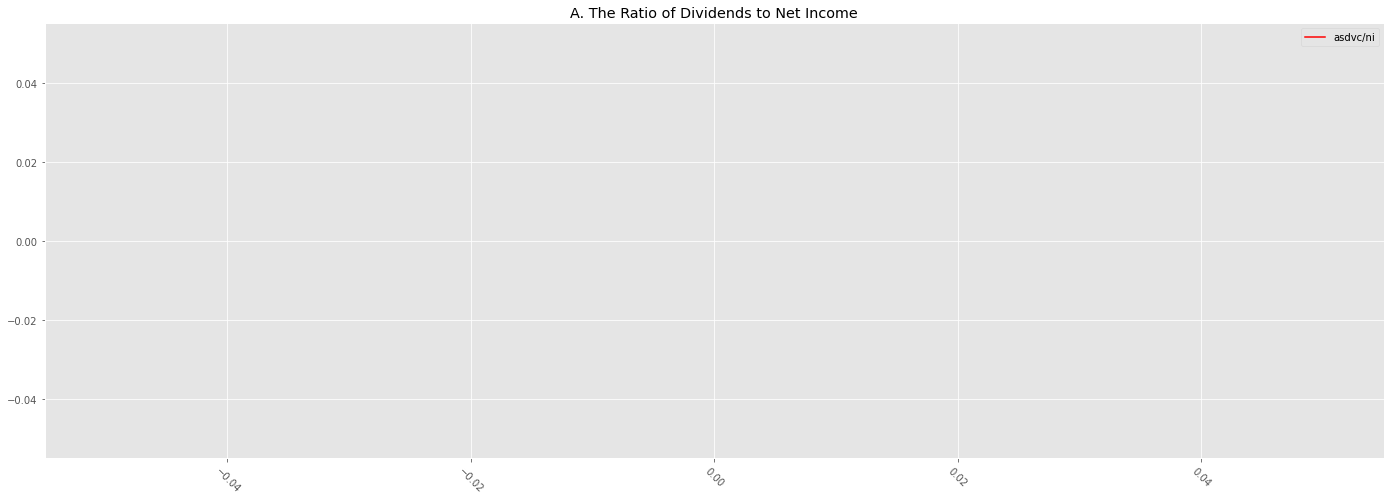

In [185]:
dfe[['asdvc/ni']].plot.line(
    title='A. The Ratio of Dividends to Net Income', 
    color = ("r") , xlabel = "", figsize=(24, 8), rot=-45)

B. Dividendsut (All as a Fraction of Toatal Assets)

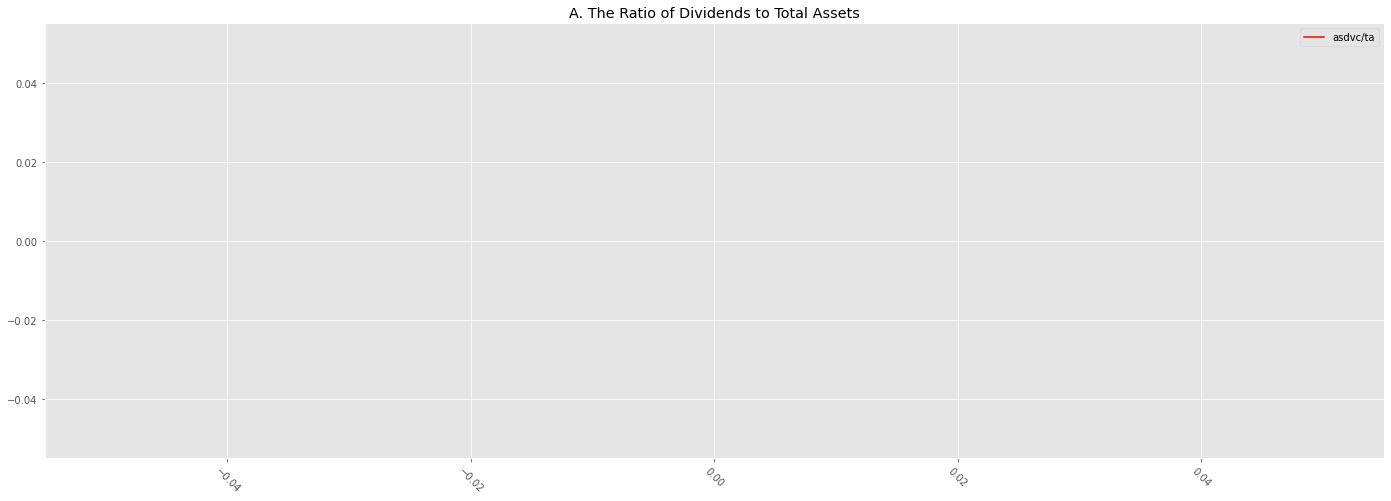

In [186]:
dfe[['asdvc/ta']].plot.line(
     title='A. The Ratio of Dividends to Total Assets', 
     color = ("r"), xlabel = "", figsize=(24, 8), rot=-45)

# Asset-Weighted Average

必要な項目を抽出し、まず、個々の企業、年度で対応するtaをかける

In [174]:
dfa = df[['ta', 'asdvc/ni', 'asdvc/ta']]

In [175]:
for i in range(1,len(dfa.columns)):
   dfa.iloc[:,i] = dfa.iloc[:,i] * df['ta']

各企業のデータを年度で合計し、各項目をtaの年度ごとの合計で割る

In [176]:
dfa = dfa.sum(level=0)

In [177]:
for i in range(len(dfa.columns)):
   dfa.iloc[:,i] = dfa.iloc[:,i] / dfa['ta']

In [178]:
dfa

,ta,asdvc/ni,asdvc/ta
fy,,,
2001,1.0,0.0,0.0
2009,1.0,0.0,0.0
2003,1.0,0.0,0.0
2005,1.0,0.0,0.0
2011,1.0,0.0,0.0
2012,1.0,0.0,0.0
2007,1.0,0.0,0.0
2002,1.0,0.0,0.0
2008,1.0,0.0,0.0


A. The Ratio of Total Payout to Net Income

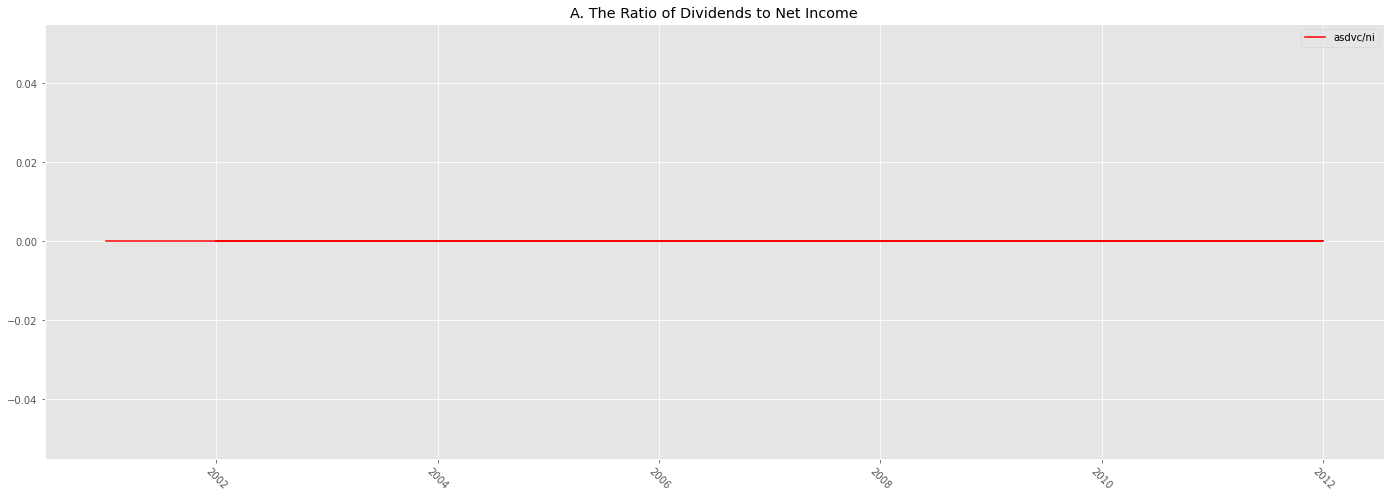

In [179]:
dfa[['asdvc/ni']].plot.line(
    title='A. The Ratio of Dividends to Net Income', 
    color = ("r") , xlabel = "", figsize=(24, 8), rot=-45)

B. Dividendsut (All as a Fraction of Toatal Assets)

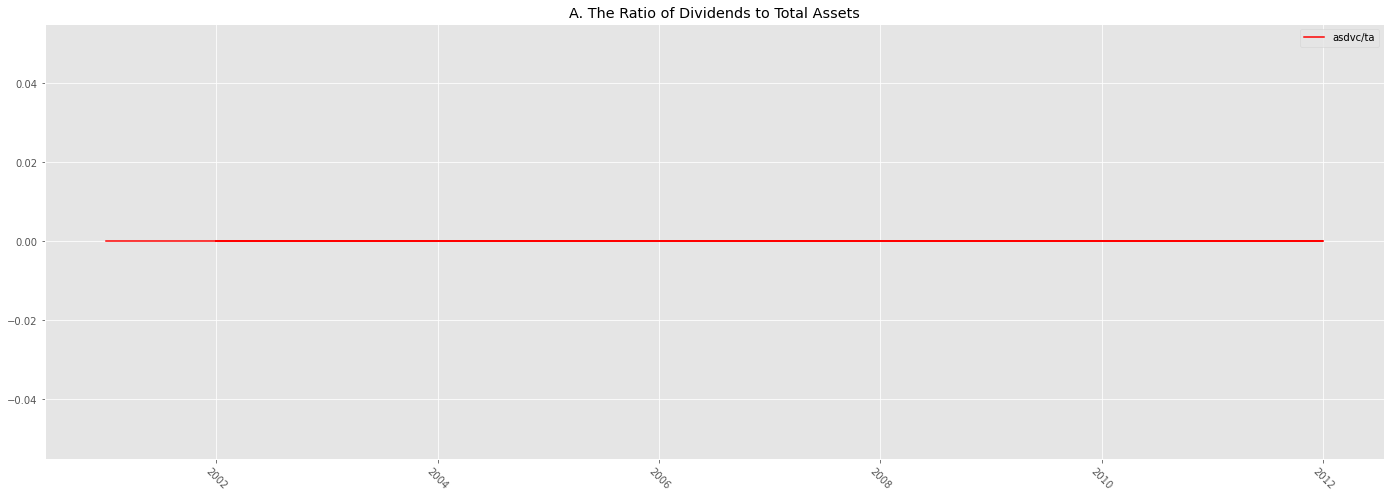

In [180]:
dfa[['asdvc/ta']].plot.line(
     title='A. The Ratio of Dividends to Total Assets', 
     color = ("r"), xlabel = "", figsize=(24, 8), rot=-45)

# 項目名略称一覧

日経会社コード　gvkey

株式コード　sc

決算期　fy

**利益処分計算書**

　普通株式配当金　asdvc　（配当したら正）

**P/L**

　利益　ni

**B/S**

　総資産　ta